In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def read_from_file(filename) :
    f = open(filename, 'r')
    lines = f.readlines()

    #appnames = []
    contents = []
    log = ''
    capture = False

    for line in lines:
        #if(line.isspace()): continue

        if(('AUL Launching' in line or 'Fork Launching' in line) and 'tv-viewer' not in line):
            capture = True
            appname = line.split('\"')[1]
            
        if(capture == True and ('app_id' in line or 'launch app' in line or 'spend time for' in line)) :
            continue

        if(capture == True and 'stablised' in line):
            sec = line.split(' ')[-1][0:-4]
            contents.append({'appname': appname, 'log': log, 'sec': sec})
            log = ''
            capture = False
            
        if(capture is True):
            log += line
            
    f.close()
    return contents

In [34]:
def draw_chart(contents):
    fig, axes = plt.subplots(len(contents), 1, figsize=(12, 16))
    fig.subplots_adjust(hspace=0.7)
    
    for i, content in enumerate(contents):
        frame = pd.read_csv(StringIO(content['log']), sep='\s+', skiprows=[0, 1])
        title = content['appname'] + ' ' + content['sec']
        frame[['tot.cpu', 'usr.cpu', 'kswapd']].plot(ax=axes[i], x=frame['time'], title=title, ylim=(0, 105), legend=False)

In [35]:
def show(filename):
    contents = read_from_file(filename)
    draw_chart(contents)

In [47]:
def launching_time(filename):
    contents = read_from_file(filename)
    for content in contents:
        print(content['sec'], end='\t')

In [49]:
launching_time("log/test08.txt")

16.5	10.6	5.5	4.1	3.3	2.4	14.4	3.5	

In [ ]:
show("log/test08.txt")

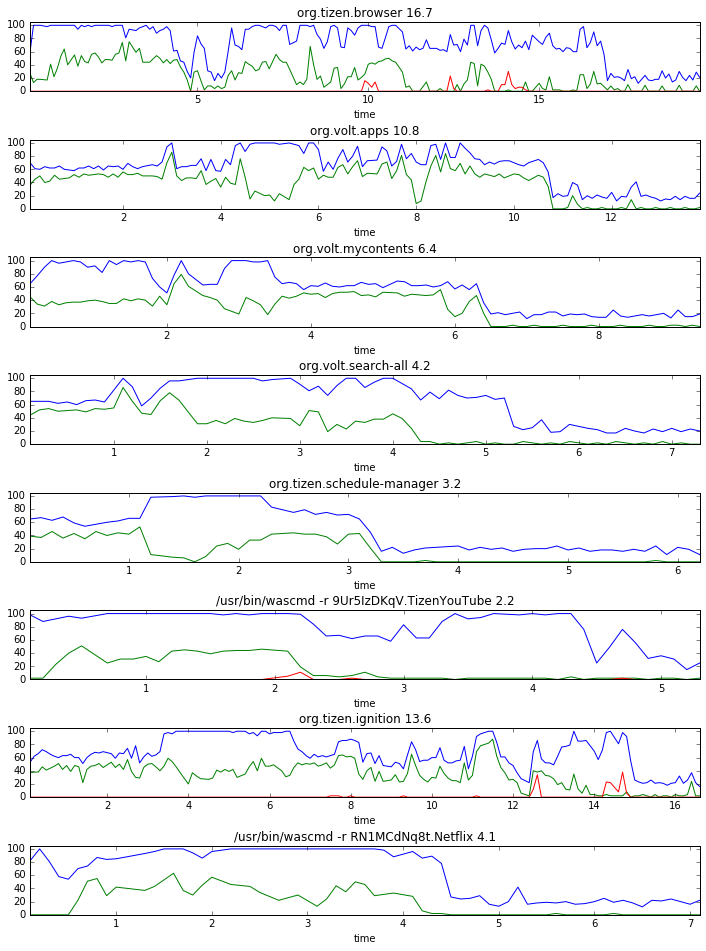

In [41]:
show("log/test13.txt")